# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrián Turiel Charro y Andrés Teruel Fernández__

In [1]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
#import csv
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('countries_of_the_world.csv')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [4]:
#eliminamos la columna de la Region y las filas de los datos que estan a NaN.
df = df.drop(['Region'], axis=1)
df = df.dropna()
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Comentarios:
Inicialmente el dataframe presenta un conjunto de datos de 227 filas x 20 columnas, pero tras eliminar la columna 'Region' y aquellas filas con algún valor nulo, el conjunto de datos queda de la forma 179 x 19.
A partir de estos datos, utilizaremos el método de Clustering para clasificar los distintos países en grupos según su similitud.


## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

### Descripción de las variables

Creemos que las variables representan los siguientes datos:


* Literacy - la definición mas común es: El % de personas que pueden leer y escribir a partir de una cierta edad.


* GPD per capita - Métrica que describe cuánto gana cada persona de media en ese pais al año.


* Phones (per 1000) - Mide el número de teléfonos por cada 1000 habitantes


* Agriculture, Industry y Service - % de la economía del país en la que afecta cada sector.

In [5]:
subconjunto = df.loc[:,["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture","Industry", "Service"]]
subconjunto

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


### Comentarios:

Hemos creado en un nuevo dataframe llamado subconjunto para guardar todas las filas de las columnas seleccionadas, para poder trabajar posteriormente con ella sin tener que modificar la tabla original

## Análisis de las distribuciones:

In [6]:
#calculamos las estadisticas de cada una de las variables.
subconjunto.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Comentarios:

Podemos observar como los rangos de las variables (las filas 'min' y 'max') son muy variados lo que hará que tengamos que modificar sus valores para conseguir que nuestro algoritmo funcione (estandarizando, normalizando, ...). Agriculture, Industry y Service parecen ser porcentajes ya toman valores entre 0 y 1 y entre los 3 siempre suman 1. El resto de variables tienen valores mucho mayores y variados.

La media está representada por la fila 'mean'

La desviación típica está representada por la fila 'std'

## Relaciones entre variables:

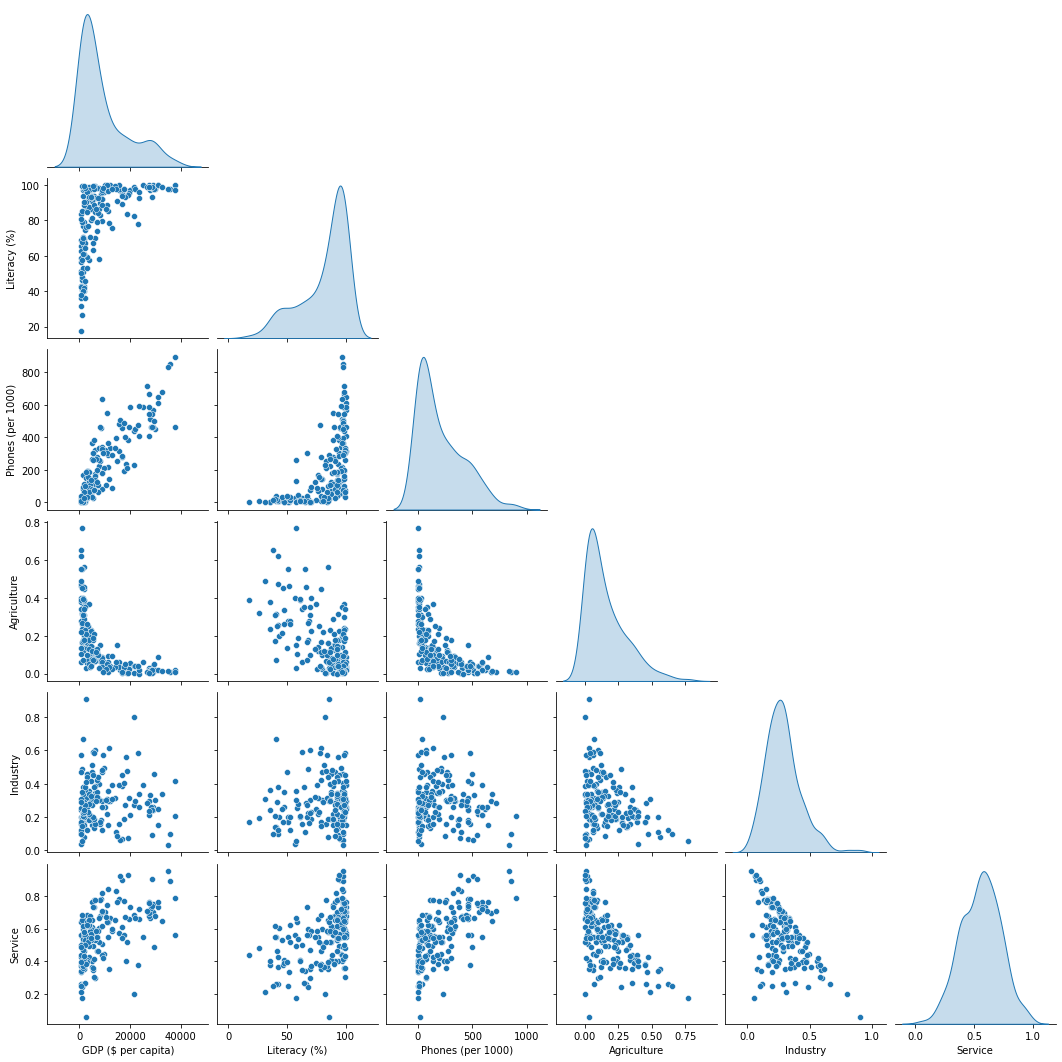

In [7]:
sns.pairplot(subconjunto, diag_kind='kde', corner = True)

### Coeficiente de correlación de Pearson:

In [8]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
subconjunto.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


### Comentarios:

Todas las variables siguen una distribución normal.

Podemos ver como las variables más relacionadas son **GPD ($ per capita)** y **Phones (per 1000)**. Tienen un coeficiente de correlación de Pearson de 0,88 que está muy cerca del 1 y en los diagramas de dispersión podemos ver como tienen una relación lineal clara.

**Agriculture** está inversamente correlacionada a **GPD**, **Literacy**, **Phones (per 1000)** y **Service**. Esto tiene sentido ya que en paises menos desarrollados, la agricultura tiene un peso muy grande en la economía y su Literatura, GPD y servicios son mucho mas bajos que en otros paises.


## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Teniendo en cuenta que los datos de agricultura, industria y sevicios están medidos entre 0 y 1 (ya que son porcentajes), deberíamos cambiar las escalas de los datos ya que las otras medidas tienen datos con valores mucho mayores ('GDP' tiene valores entre 500 y 37800). Literacy deberíamos reescalarla ya que también es un porcentaje pero sus valores están en el rango 0 - 100. 

In [9]:
copia = subconjunto.copy()

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(copia)
scaled_data = scaler.transform(copia)

In [11]:
scaled_data

array([[-0.87611209, -2.32251665, -0.97813165,  1.47823878, -0.3432598 ,
        -1.05630628],
       [-0.48098449,  0.23030306, -0.65360217,  0.49758315, -0.7149083 ,
         0.14824877],
       [-0.32501307, -0.60378655, -0.62067197, -0.37042959,  2.22969138,
        -1.55265559],
       ...,
       [-0.86571399, -1.60469408, -0.81586691, -0.14514384,  1.3148643 ,
        -0.97761675],
       [-0.86571399, -0.06794717, -0.95426919,  0.41807053,  0.01409453,
        -0.39652487],
       [-0.75133495,  0.44261677, -0.86550083,  0.14640242, -0.32181854,
         0.14824877]])

In [12]:
dfScaled = pd.DataFrame(scaled_data, columns=subconjunto.columns) # para poder mostralo más visual, como un DataFrame
dfScaled

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,-0.876112,-2.322517,-0.978132,1.478239,-0.343260,-1.056306
1,-0.480984,0.230303,-0.653602,0.497583,-0.714908,0.148249
2,-0.325013,-0.603787,-0.620672,-0.370430,2.229691,-1.552656
3,-0.054663,0.659986,1.201943,-0.774619,-0.772085,1.364910
4,0.194892,0.356680,1.630990,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...
174,-0.449790,0.579104,-0.324777,-0.774619,0.936069,-0.081767
175,-0.688946,0.422396,-0.097607,0.345184,0.871745,-1.050253
176,-0.865714,-1.604694,-0.815867,-0.145144,1.314864,-0.977617
177,-0.865714,-0.067947,-0.954269,0.418071,0.014095,-0.396525


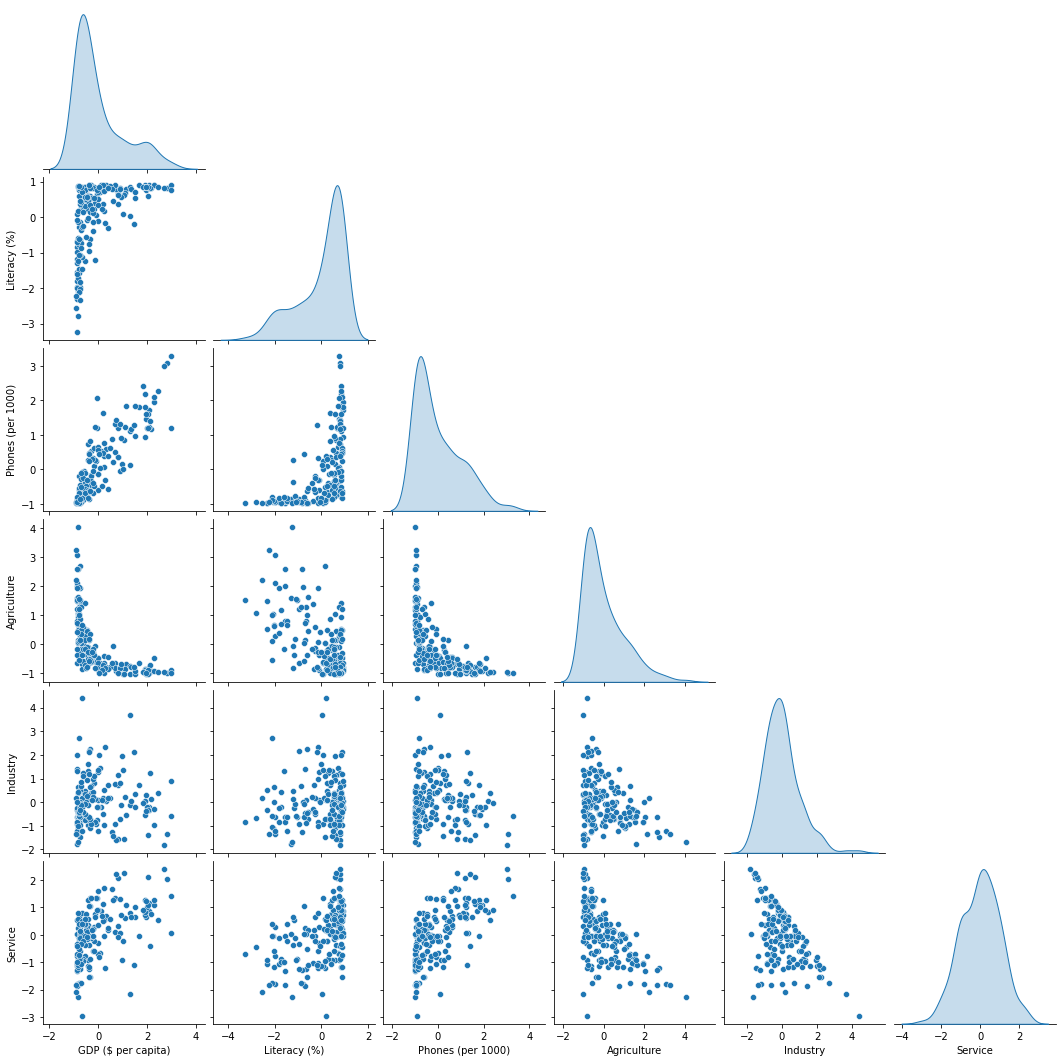

In [13]:
sns.pairplot(dfScaled, diag_kind='kde', corner = True) # para comparar las variables dos a dos

* Comentarios: Teniendo en cuenta que los datos de agricultura, industria y sevicios están medidos entre 0 y 1 (ya que son porcentajes) y otras variables con valores mucho mayores ('GDP' tiene valores entre 500 y 37800), deberíamos cambiar las escalas de los datos. Debido a estos rangos tan diferentes, aprovechando que todas las variables siguen una distribución normal, hemos decidido estandarizarlas. Tras aplicarlo la estandarizacion, vemos que prácticamente los datos mantienen las mismas distribuciones que antes pero ahora en un mismo rango de valores, centradas en cero y con una varianza de uno.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [14]:

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

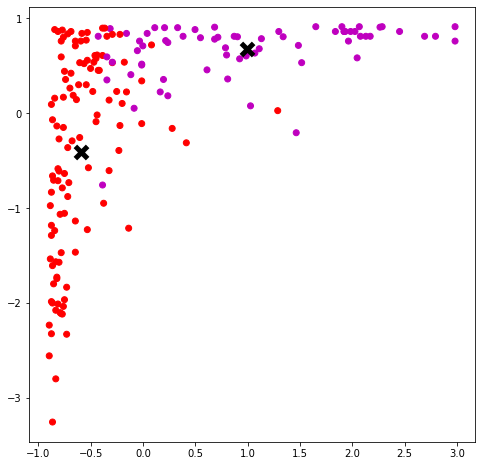

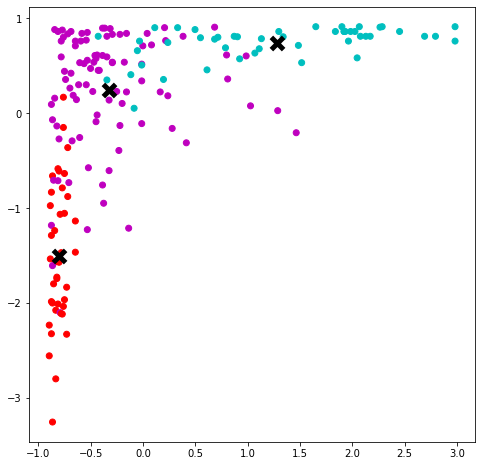

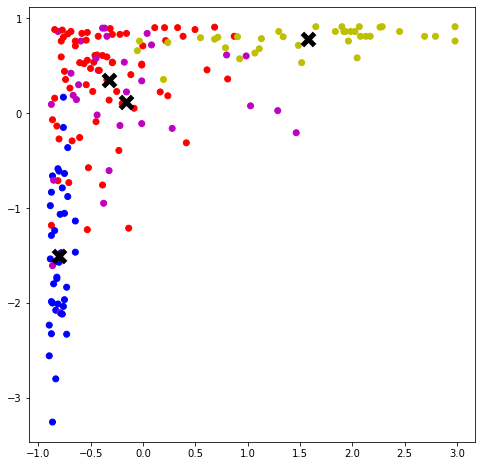

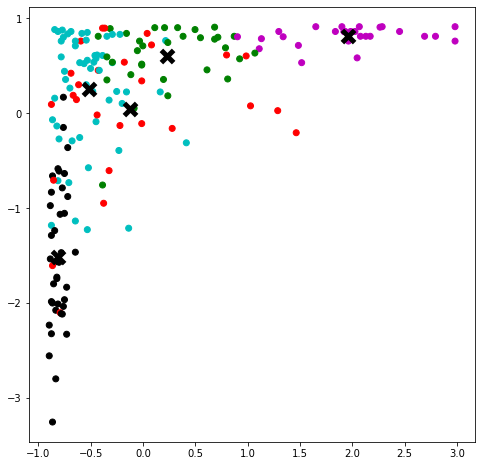

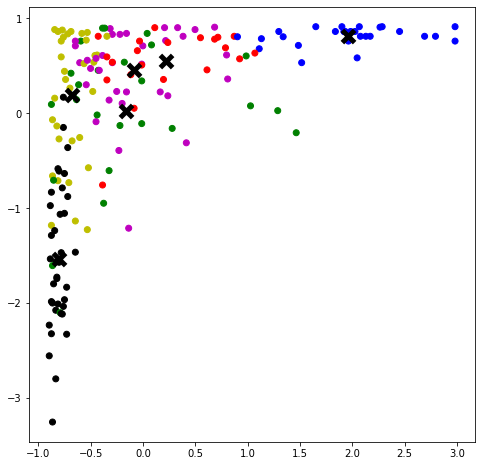

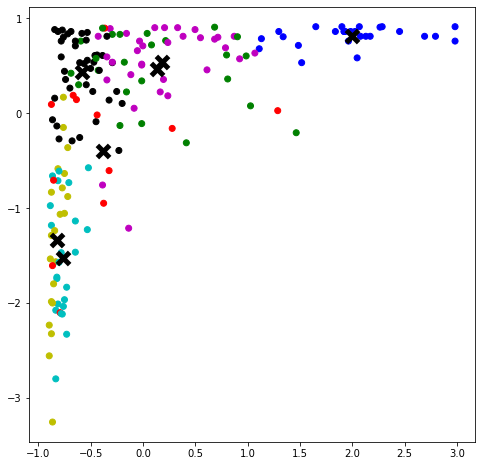

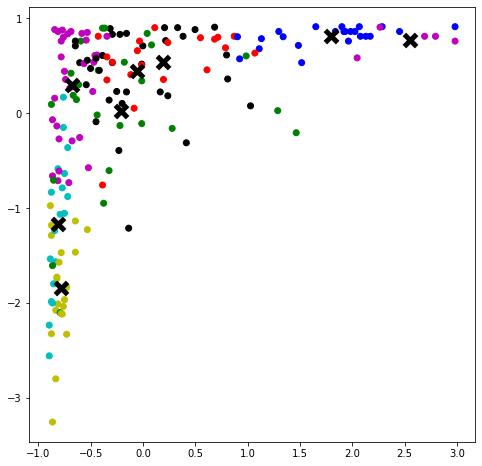

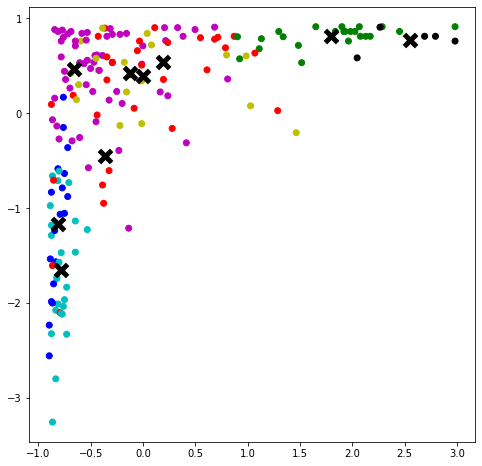

In [15]:
X = scaled_data

K_MIN = 2
K_MAX = 10
score = np.zeros(K_MAX-K_MIN)
davies_boulding = np.zeros(K_MAX-K_MIN)
silhouette = np.zeros(K_MAX-K_MIN)

for k in range(K_MIN, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X)
    #plot_clusters(X, km.labels_, km.cluster_centers_)

    score[k-K_MIN] = -1 * km.score(X)
    davies_boulding[k-K_MIN] = davies_bouldin_score(X, km.labels_)
    silhouette[k-K_MIN] = silhouette_score(X, km.labels_)

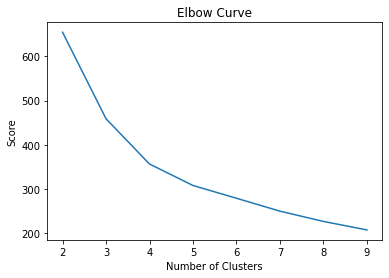

In [16]:
# diagrama del codo
plt.plot(range(K_MIN, K_MAX), score)  # dibuja la gráfica
plt.xlabel('Number of Clusters')      # añade un titulo a los ejes
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()                            # muesta la gráfica
# En el diagrama del codo buscamos un valor de K en el que la curva deja de descender tan rápidamente.
# En este caso podemos ver que K=4 es una buena elección

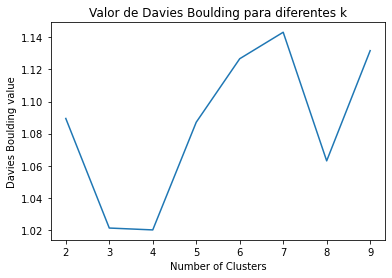

In [17]:
# davies boulding
plt.plot(range(K_MIN, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()
#El mejor valor de Davies–Bouldin (el más pequeño) se obtiene también para K = 4.

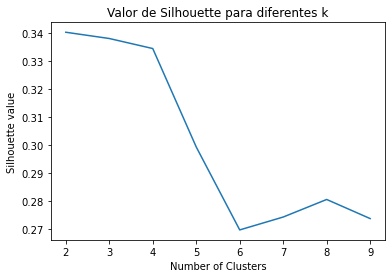

In [18]:
# silhouette
plt.plot(range(K_MIN, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()
# El mejor valor de Silhouette (el más cercano a 1) se obtiene también para k=4. El k=2 también sería
# una buena opción, pero para mayor similitud con las otras gráfica elegiremos el k=4.

// TODO Comprobar que los de abajo no sea un triple de atuch xd
* Comentarios: Como estamos en aprendizaje no supervisado, no hay una solución correcta. El objetivo es descubrir una estructura en los datos. En este caso las 3 métricas nos dan el mismo resultado. En general esto no tiene por qué ser así, pero noy ayuda a confirmar y fortalecer la decisión de agrupar los datos con 4 clusters.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [19]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=4, random_state=RANDOM_STATE)

# Agrupar los puntos en clusters
km.fit(dfScaled)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_
subconjunto['label'] = labels

In [20]:
centers

array([[-0.32911373,  0.35276435, -0.19843411, -0.17426114, -0.19468093,
         0.31841593],
       [-0.80492513, -1.50099996, -0.9411999 ,  1.46039941, -0.59212502,
        -0.82799801],
       [ 1.57674372,  0.78064256,  1.58588989, -0.86058304, -0.35661356,
         1.09140804],
       [-0.16635827,  0.12349393, -0.30542575, -0.38325421,  1.6279528 ,
        -1.0254553 ]])

In [21]:
# mostramos la matriz transpuesta para que la info salga en vertical
subconjunto.groupby(["label"]).describe().transpose()

label                                0            1             2  \
GDP ($ per capita) count     71.000000    39.000000     38.000000   
                   mean    5960.563380  1384.615385  24289.473684   
                   std     4176.891492   627.668393   7860.912177   
                   min      700.000000   500.000000   8600.000000   
                   25%     2750.000000   800.000000  18350.000000   
                   50%     4900.000000  1300.000000  27100.000000   
                   75%     7900.000000  1800.000000  29075.000000   
                   max    17500.000000  2900.000000  37800.000000   
Literacy (%)       count     71.000000    39.000000     38.000000   
                   mean      88.922535    52.251282     97.386842   
                   std       10.880825    14.939472      2.403508   
                   min       57.700000    17.600000     89.000000   
                   25%       84.900000    41.950000     96.775000   
                   50%       92.300000    51.000000     97.950000   
                   75%       97.900000    63.650000     99.000000   
                   max       99.900000    85.300000    100.000000   
Phones (per 1000)  count     71.000000    39.000000     38.000000   
                   mean     166.573239    10.938462    540.450000   
                   std      111.910989    10.065591    129.949842   
                   min        7.900000     0.200000    365.300000   
                   25%       77.100000     3.450000    460.150000   
                   50%      137.900000     7.900000    503.500000   
                   75%      265.950000    14.350000    590.675000   
                   max      463.800000    45.400000    898.000000   
Agriculture        count     71.000000    39.000000     38.000000   
                   mean       0.130606     0.377308      0.027026   
                   std        0.084838     0.134986      0.020330   
                   min        0.005000     0.172000      0.000000   
                   25%        0.066500     0.277500      0.010250   
                   50%        0.112000     0.353000      0.021000   
                   75%        0.177500     0.452500      0.039500   
                   max        0.370000     0.769000      0.086000   
Industry           count     71.000000    39.000000     38.000000   
                   mean       0.260789     0.205179      0.238132   
                   std        0.073087     0.086204      0.104100   
                   min        0.088000     0.040000      0.032000   
                   25%        0.201500     0.150000      0.165000   
                   50%        0.275000     0.200000      0.252000   
                   75%        0.312000     0.255000      0.295750   
                   max        0.393000     0.381000      0.460000   
Service            count     71.000000    39.000000     38.000000   
                   mean       0.607113     0.417718      0.734816   
                   std        0.089955     0.117600      0.107742   
                   min        0.418000     0.177000      0.490000   
                   25%        0.549000     0.351500      0.673750   
                   50%        0.596000     0.401000      0.729000   
                   75%        0.662500     0.526500      0.780000   
                   max        0.818000     0.620000      0.954000   

label                                3  
GDP ($ per capita) count     31.000000  
                   mean    7525.806452  
                   std     6238.641291  
                   min      700.000000  
                   25%     3100.000000  
                   50%     5600.000000  
                   75%     9250.000000  
                   max    23200.000000  
Literacy (%)       count     31.000000  
                   mean      84.387097  
                   std       14.113770  
                   min       40.400000  
                   25%       79.600000  
                   50%       86.400000  
   

In [22]:
subconjunto

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,label
0,700.0,36.0,3.2,0.380,0.240,0.380,1
1,4500.0,86.5,71.2,0.232,0.188,0.579,0
2,6000.0,70.0,78.1,0.101,0.600,0.298,3
6,8600.0,95.0,460.0,0.040,0.180,0.780,2
7,11000.0,89.0,549.9,0.038,0.220,0.743,2
...,...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541,3
219,2500.0,90.3,187.7,0.209,0.410,0.381,3
224,800.0,50.2,37.2,0.135,0.472,0.393,3
225,800.0,80.6,8.2,0.220,0.290,0.489,0


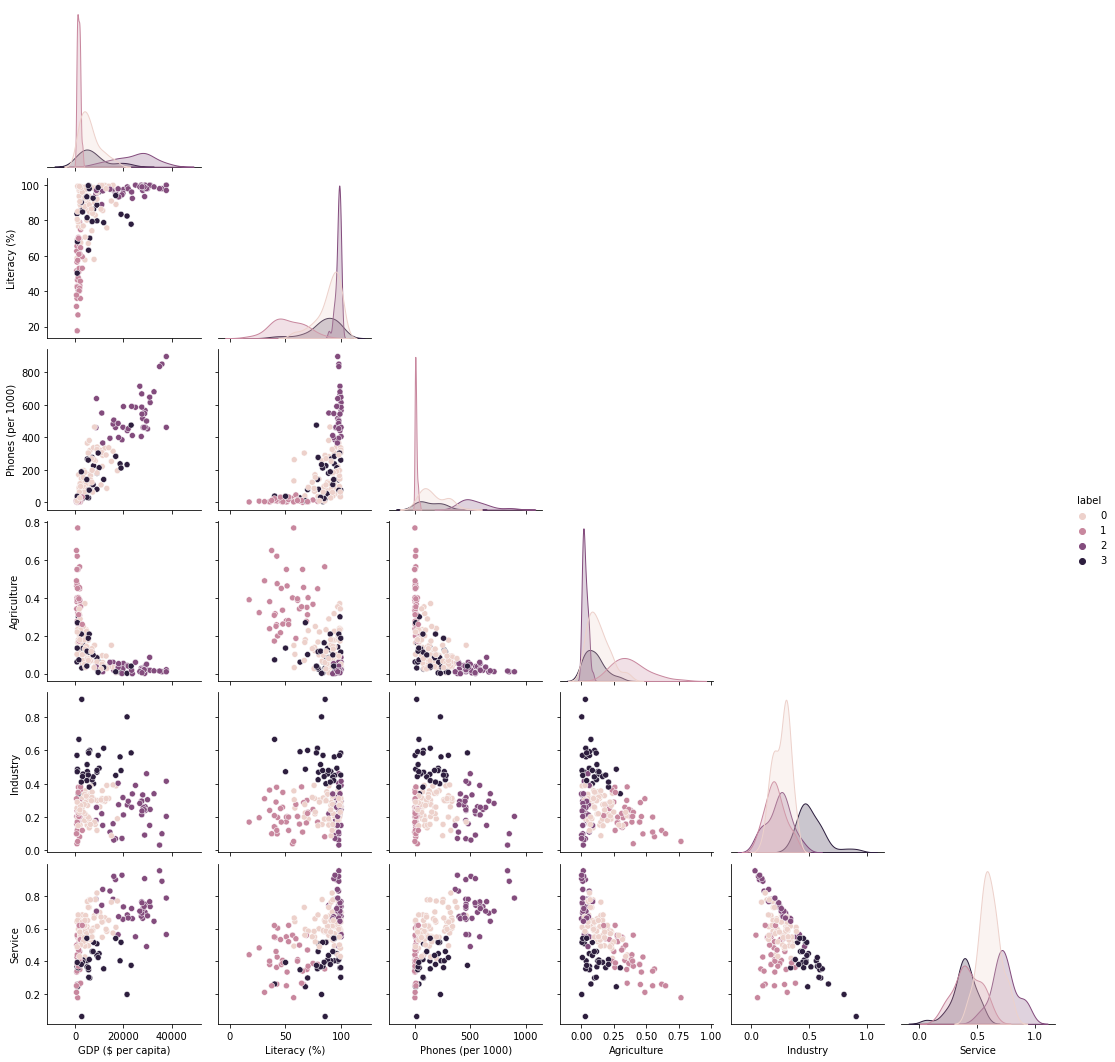

In [23]:
import seaborn as sns

sns.pairplot(subconjunto, diag_kind='kde', hue='label', corner = True)